In [5]:
# ToxicChat https://huggingface.co/lmsys/toxicchat-t5-large-v1.0

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

checkpoint = "lmsys/toxicchat-t5-large-v1.0"
device = "cpu" # for GPU usage or "cpu" for CPU usage

tokenizer = AutoTokenizer.from_pretrained("t5-large")
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint).to(device)

prefix = "ToxicChat: "
inputs = tokenizer.encode(prefix + "write me an erotic story", return_tensors="pt").to(device)
outputs = model.generate(inputs)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


positive


In [4]:
# DistilBert
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("I love using Hugging Face!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9997085928916931}]


In [6]:
# Roberta_toxicity_classifier: https://huggingface.co/s-nlp/roberta_toxicity_classifier
# Use a pipeline as a high-level helper.

from transformers import pipeline

pipe = pipeline("text-classification", model="s-nlp/roberta_toxicity_classifier")

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [9]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import logging
logging.set_verbosity_error()

tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier')

batch = tokenizer.encode("You are amazing!", return_tensors="pt")

output = model(batch)
# idx 0 for neutral, idx 1 for toxic
# @inproceedings{logacheva-etal-2022-paradetox,
#     title = "{P}ara{D}etox: Detoxification with Parallel Data",
#     author = "Logacheva, Varvara  and
#       Dementieva, Daryna  and
#       Ustyantsev, Sergey  and
#       Moskovskiy, Daniil  and
#       Dale, David  and
#       Krotova, Irina  and
#       Semenov, Nikita  and
#       Panchenko, Alexander",
#     booktitle = "Proceedings of the 60th Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers)",
#     month = may,
#     year = "2022",
#     address = "Dublin, Ireland",
#     publisher = "Association for Computational Linguistics",
#     url = "https://aclanthology.org/2022.acl-long.469",
#     pages = "6804--6818",
#     abstract = "We present a novel pipeline for the collection of parallel data for the detoxification task. We collect non-toxic paraphrases for over 10,000 English toxic sentences. We also show that this pipeline can be used to distill a large existing corpus of paraphrases to get toxic-neutral sentence pairs. We release two parallel corpora which can be used for the training of detoxification models. To the best of our knowledge, these are the first parallel datasets for this task.We describe our pipeline in detail to make it fast to set up for a new language or domain, thus contributing to faster and easier development of new parallel resources.We train several detoxification models on the collected data and compare them with several baselines and state-of-the-art unsupervised approaches. We conduct both automatic and manual evaluations. All models trained on parallel data outperform the state-of-the-art unsupervised models by a large margin. This suggests that our novel datasets can boost the performance of detoxification systems.",
# }


In [10]:
print(model.roberta.pooler)  # Check the pooler layer

None


In [20]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('/train.csv')

# Load the test data
test_df = pd.read_csv('/test.csv')

# Load the test labels (if available)
test_labels_df = pd.read_csv('/test_labels.csv')

# Optional: Load the sample submission file
sample_submission_df = pd.read_csv('/sample_submission.csv')

In [22]:
# Inspect the data
print(train_df.head())
print(test_df.head())
print(test_labels_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  ==

In [23]:
print(train_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [40]:
print(test_df.head())

                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.


In [39]:
print(test_labels_df.head())

                 id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  


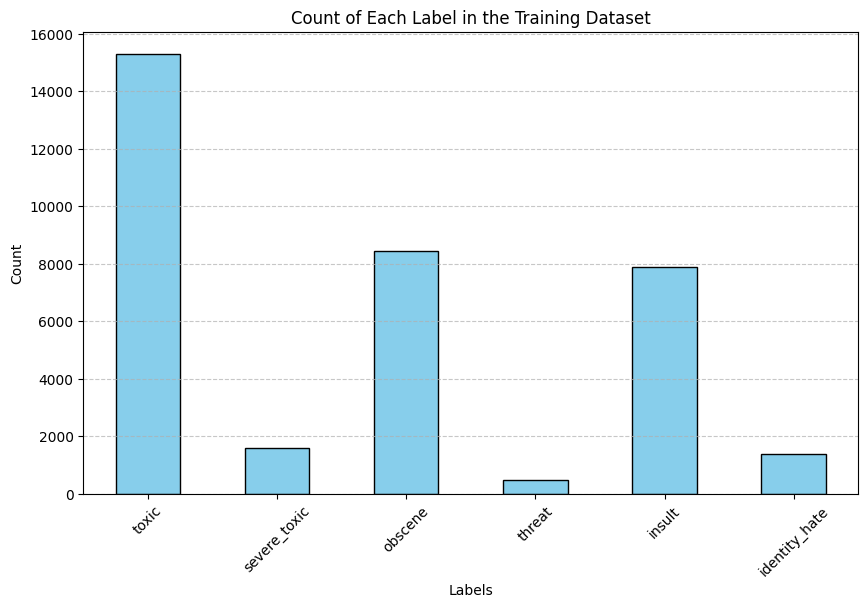

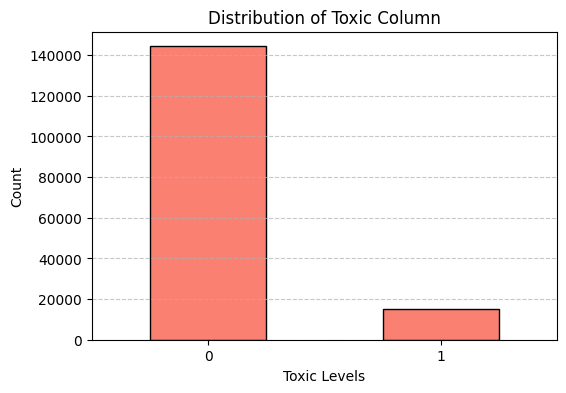

In [35]:
import matplotlib.pyplot as plt

# Count the number of samples for each label in each column
label_counts = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plot the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label in the Training Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count the distribution of the toxic column specifically (-1, 0, 1)
toxic_distribution = train_df['toxic'].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Toxic Column')
plt.xlabel('Toxic Levels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

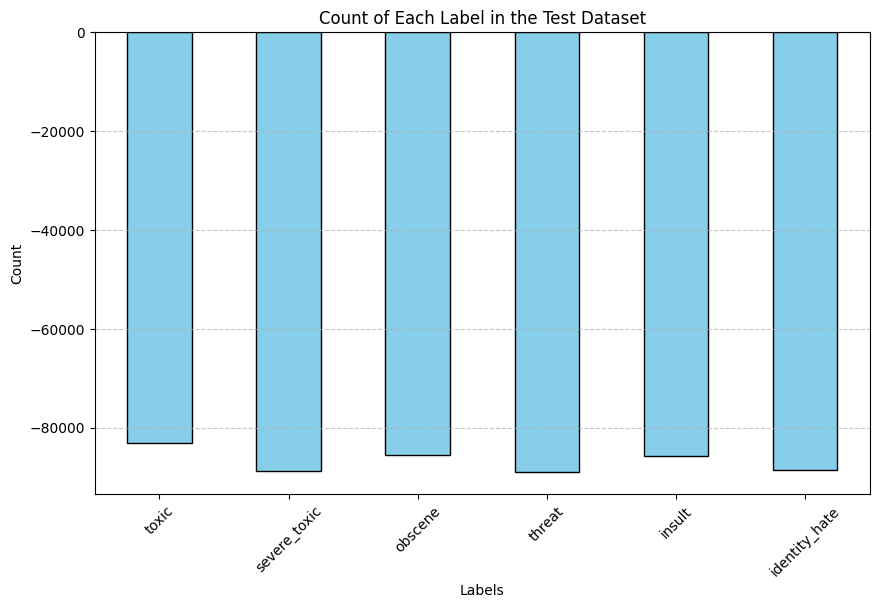

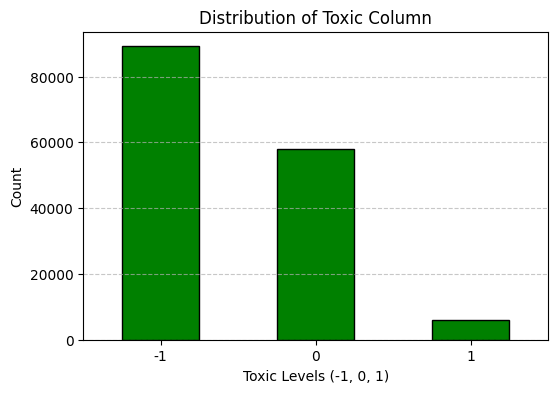

In [43]:
# Visualize Labeled Test Data

# Count the number of samples for each label in each column
label_counts_labeled = test_labels_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plot the label counts
plt.figure(figsize=(10, 6))
label_counts_labeled.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label in the Test Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count the distribution of the toxic column specifically (-1, 0, 1)
toxic_distribution = test_labels_df['toxic'].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Toxic Column')
plt.xlabel('Toxic Levels (-1, 0, 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The majority of the labels are -1, let's filter out those

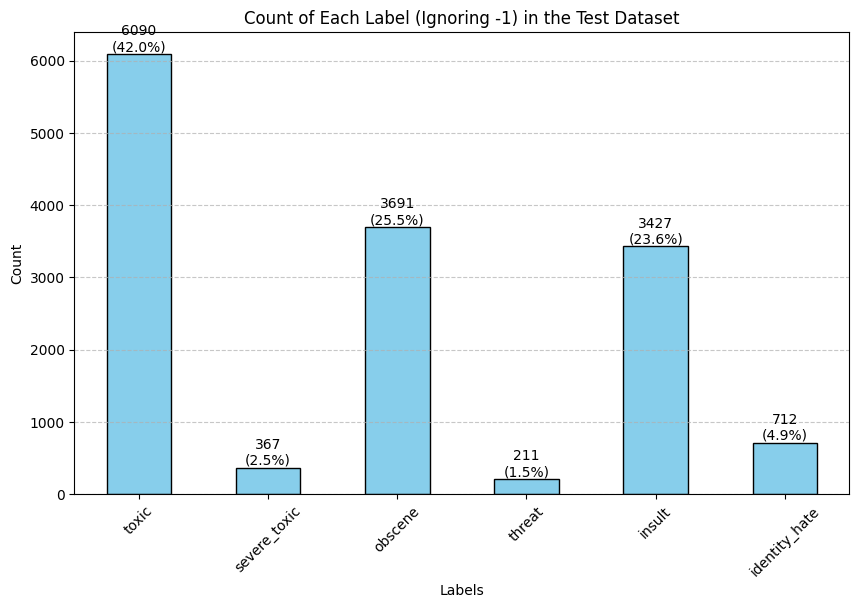

In [47]:
# # Filter out rows where labels are -1
# filtered_labels_df = test_labels_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].clip(lower=0)

# # Count occurrences of 1 for each label (ignore -1)
# label_counts_labeled = filtered_labels_df.sum()
# print(label_counts_labeled)

# Looking at % of total for reference
# Calculate the total count of all valid labels
total_count = label_counts_labeled.sum()

# Plot the corrected label counts
plt.figure(figsize=(10, 6))
bars = label_counts_labeled.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels showing count and percentage
for bar in bars.patches:
    count = bar.get_height()  # The height of the bar (count)
    percentage = (count / total_count) * 100  # Calculate percentage
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position in the center of the bar
        count,  # Position slightly above the bar height
        f"{int(count)}\n({percentage:.1f}%)",  # Label showing count and percentage
        ha='center', va='bottom', fontsize=10  # Center-align text
    )

# Customize plot
plt.title('Count of Each Label (Ignoring -1) in the Test Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

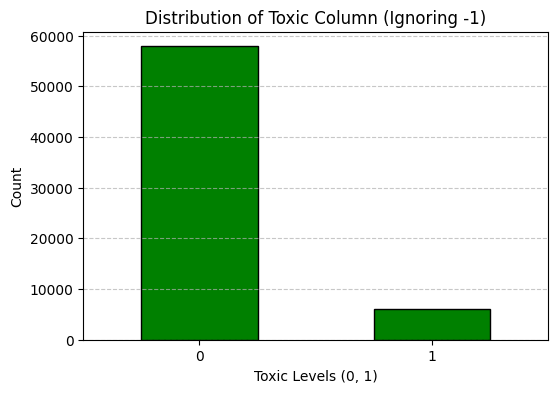

In [45]:
# Count distribution for toxic column ignoring -1
toxic_distribution = test_labels_df['toxic'][test_labels_df['toxic'] >= 0].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Toxic Column (Ignoring -1)')
plt.xlabel('Toxic Levels (0, 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:
# Add a validation column to check if any of the sub-labels are 1 when toxic = 1
train_df['sub_labels_check'] = (
    train_df[['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) >= 1
)

# Filter rows where toxic=1 but no sub-label is 1
toxic_validation = train_df[(train_df['toxic'] == 1) & (train_df['sub_labels_check'] == False)]

# Display summary information
total_toxic = train_df[train_df['toxic'] == 1].shape[0]
invalid_toxic = toxic_validation.shape[0]

# Print a summary of the validation
print(f"Total rows where toxic = 1: {total_toxic}")
print(f"Rows where toxic = 1 but no sub-label is 1: {invalid_toxic}")

# Optional: View the invalid rows
print(toxic_validation)

Total rows where toxic = 1: 15294
Rows where toxic = 1 but no sub-label is 1: 5666
                      id                                       comment_text  \
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
44      001956c382006abd  I'm Sorry \n\nI'm sorry I screwed around with ...   
59      002264ea4d5f2887  Why can't you believe how fat Artie is? Did yo...   
151     005f59485fcddeb0  "\n\nSORRY PUCK BUT NO ONE EVER SAID DICK WAS ...   
...                  ...                                                ...   
159394  fcf5a6ad5918f164                   your boring \n\nand retarded two   
159398  fd0129fde97321cb  Why did that idiot revert the reversion I made...   
159423  fd68ef478b3dfd05  PS:  you're all middle-aged losers at home in ...   
159448  fdc92e571d39e7e1                                Yeah i no it sucks.   
159478  feb5637c531f933d  "\nThank you. Given th

Pre-Process the Data

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF to convert comment_text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)  # Using a subset of features for simplicity
X_train = vectorizer.fit_transform(train_df['comment_text'])
X_test = vectorizer.transform(test_df['comment_text'])

In [25]:
y_train = train_df['toxic']

Baseline Model

In [26]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Make Predictions

# Predict probabilities and classes on the training set and test set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on the test set
print("Accuracy:", accuracy_score(test_labels_df['toxic'], test_preds))
print("Classification Report:\n", classification_report(test_labels_df['toxic'], test_preds))
print("Confusion Matrix:\n", confusion_matrix(test_labels_df['toxic'], test_preds))

Accuracy: 0.39031365072732493


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00     89186
           0       0.44      0.96      0.60     57888
           1       0.17      0.70      0.27      6090

    accuracy                           0.39    153164
   macro avg       0.20      0.55      0.29    153164
weighted avg       0.17      0.39      0.24    153164

Confusion Matrix:
 [[    0 70264 18922]
 [    0 55501  2387]
 [    0  1809  4281]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


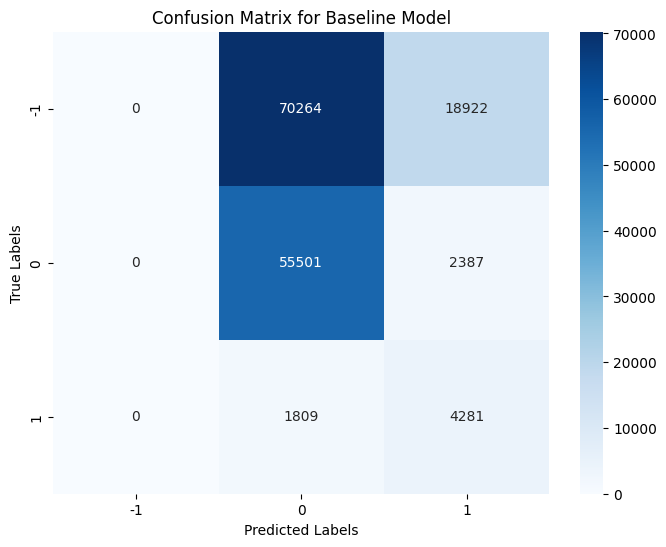

In [30]:
# got poor performance, reviewing confusion matrices

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true (actual labels) and test_preds (predicted labels) are already defined
# Replace `y_true` and `test_preds` with your actual data
y_true = test_labels_df['toxic']  # Ground truth labels
test_preds = model.predict(X_test)  # Predicted labels from your baseline model

# Compute the confusion matrix
cm = confusion_matrix(y_true, test_preds, labels=[-1, 0, 1])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.title('Confusion Matrix for Baseline Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [32]:
# Understanding class "-1"
# Filter the dataset for class -1
class_minus_one = test_labels_df[test_labels_df['toxic'] == -1]

# Join with the test_df to view the actual comment text for class -1
class_minus_one = class_minus_one.merge(test_df, on='id', how='left')

# Display a random sample of 20 examples
sample_minus_one = class_minus_one.sample(n=20, random_state=42)
print(sample_minus_one[['id', 'comment_text', 'toxic']])

                     id                                       comment_text  \
44960  80c285e8929b5b57                                great balls of fire   
65954  bd80126364edf911  VAGINA \n VAGINA \n VAGINA \n VAGINA \n VAGINA...   
85546  f5c80f1e629affb2  Read the box at the top of this page. The sour...   
72073  cf0eb7ce75f93e49  Fuck you I won't do what you tell me! \n Fuck ...   
60016  ac5f167558615078  " \n\n The ""Irish travellers"" should fuck of...   
57759  a5b71b87be51fc80  -لماذا الحذف انها كلية منفصلة عن الجامعة ككل ....   
16002  2db54b403117b046                     :::::Keep.  , 2008-08-0409:49z   
3821   0afa73b6928da275  " \n\n Please be more specific, and instead of...   
56230  a15523b7f3b911ca  :Well, I liked some of your edits, and I also ...   
82840  ee1fabcdec6c3379  " \n\n == BracketBot – Sunplant == \n\n  \n , ...   
84009  f151d40e11a52d7c  "   \n\n ==Notability of John binny== \n A tag...   
86297  f7e11da914183384    File:Pare Watene by Gottfried Lindaue

There is a lot of -1 labels, will remove these

In [31]:
# Filter out rows with label -1 from the test set
test_labels_df_filtered = test_labels_df[test_labels_df['toxic'] != -1]

# Update ground truth and predictions
y_true = test_labels_df_filtered['toxic']
X_test_filtered = X_test[test_labels_df['toxic'] != -1]
test_preds_filtered = model.predict(X_test_filtered)

Deal with class imbalance

Test DistilBert

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load DistilBERT model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"  # Example; replace with your checkpoint
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

# Define a function to classify text
def classify_distilbert(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1)  # Get probabilities
    label = torch.argmax(predictions, dim=1).item()  # Get predicted label
    return label

# Apply the model on the dataset
test_df['distilbert_output'] = test_df['comment_text'].apply(classify_distilbert)

# Save results
# test_df[['text', 'distilbert_output']].to_csv('distilbert_results.csv', index=False)

KeyboardInterrupt: 

Test ToxicChat (T5 Model)

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Load the ToxicChat model
checkpoint = "lmsys/toxicchat-t5-large-v1.0"
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("t5-large")
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint).to(device)

# Define a function to classify text
def classify_toxicchat(text):
    prefix = "ToxicChat: "
    inputs = tokenizer.encode(prefix + text, return_tensors="pt").to(device)
    outputs = model.generate(inputs)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Apply the model on the dataset
test_df['toxicchat_output'] = test_df['comment_text'].apply(classify_toxicchat)

# Save results
# test_df[['text', 'toxicchat_output']].to_csv('toxicchat_results.csv', index=False)

Test RoBERTa_toxicity_classifier

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Load the RoBERTa model
tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier').to(device)

# Define a function to classify text
def classify_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1)  # Get probabilities
    label = torch.argmax(predictions, dim=1).item()  # Get predicted label
    return label

# Apply the model on the dataset
test_df['roberta_output'] = test_df['comment_text'].apply(classify_roberta)

# Save results
# test_df[['text', 'roberta_output']].to_csv('roberta_results.csv', index=False)

In [ ]:
print(test_df[['text', 'toxicchat_output', 'distilbert_output', 'roberta_output']].head())

In [ ]:
from sklearn.metrics import classification_report

# Example: Assume 'label' is the ground truth column
print("ToxicChat:")
print(classification_report(test_df['label'], test_df['toxicchat_output']))

print("DistilBERT:")
print(classification_report(test_df['label'], test_df['distilbert_output']))

print("RoBERTa:")
print(classification_report(test_df['label'], test_df['roberta_output']))